In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.metrics.pairwise import linear_kernel,cosine_similarity





In [8]:
df=pd.read_csv("BigBasket Products.csv")

In [9]:
df.head(10)

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...
5,6,Germ - Removal Multipurpose Wipes,Cleaning & Household,All Purpose Cleaners,Nature Protect,169.0,199.0,Disinfectant Spray & Cleaners,3.3,Stay protected from contamination with Multipu...
6,7,Multani Mati,Beauty & Hygiene,Skin Care,Satinance,58.0,58.0,Face Care,3.6,Satinance multani matti is an excellent skin t...
7,8,Hand Sanitizer - 70% Alcohol Base,Beauty & Hygiene,Bath & Hand Wash,Bionova,250.0,250.0,Hand Wash & Sanitizers,4.0,70%Alcohol based is gentle of hand leaves skin...
8,9,Biotin & Collagen Volumizing Hair Shampoo + Bi...,Beauty & Hygiene,Hair Care,StBotanica,1098.0,1098.0,Shampoo & Conditioner,3.5,"An exclusive blend with Vitamin B7 Biotin, Hyd..."
9,10,"Scrub Pad - Anti- Bacterial, Regular",Cleaning & Household,"Mops, Brushes & Scrubs",Scotch brite,20.0,20.0,"Utensil Scrub-Pad, Glove",4.3,Scotch Brite Anti- Bacterial Scrub Pad thoroug...


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18929 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


In [11]:
df.shape

(27555, 10)

In [12]:
df.drop(columns=["index"],axis=1,inplace=True)

In [13]:
df.head()

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [24]:
x=df.isnull().sum()
print(x)
print(type(x))

product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8626
description      115
dtype: int64
<class 'pandas.core.series.Series'>


In [17]:
print("percentage of null values in each columns")
print('-'*30)
for i in df.columns:
    null_count=df[i].isnull().sum()
    total_count=df.shape[0]
    print("{}:{:.2f}".format(i,null_count/total_count*100))

percentage of null values in each columns
------------------------------
product:0.00
category:0.00
sub_category:0.00
brand:0.00
sale_price:0.00
market_price:0.00
type:0.00
rating:31.30
description:0.42


In [25]:
print("Total Null values")
null_count1=df.isnull().sum().sum()
total_count=df.shape[0]*len(df.columns)
print("{:.2f}".format(null_count1/total_count*100))

Total Null values
3.53


In [26]:
df=df.dropna()

In [27]:
df.shape

(18840, 9)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18840 entries, 0 to 27554
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product       18840 non-null  object 
 1   category      18840 non-null  object 
 2   sub_category  18840 non-null  object 
 3   brand         18840 non-null  object 
 4   sale_price    18840 non-null  float64
 5   market_price  18840 non-null  float64
 6   type          18840 non-null  object 
 7   rating        18840 non-null  float64
 8   description   18840 non-null  object 
dtypes: float64(3), object(6)
memory usage: 1.4+ MB


In [29]:
counts=df['category'].value_counts()
counts_df=pd.DataFrame({'Category':counts.index,'Counts':counts.values})

In [30]:
counts_df.head()

,Category,Counts
0,Beauty & Hygiene,5460
1,"Kitchen, Garden & Pets",2494
2,Snacks & Branded Foods,2468
3,Gourmet & World Food,2364
4,"Foodgrains, Oil & Masala",2173


In [32]:
type(counts)

pandas.core.series.Series

In [33]:
!pip install plotly

C:\Users\eatha\AppData\Local\Temp\ipykernel_20452\2718441695.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=counts_df, x='Category', y='Counts', palette='Blues_d')


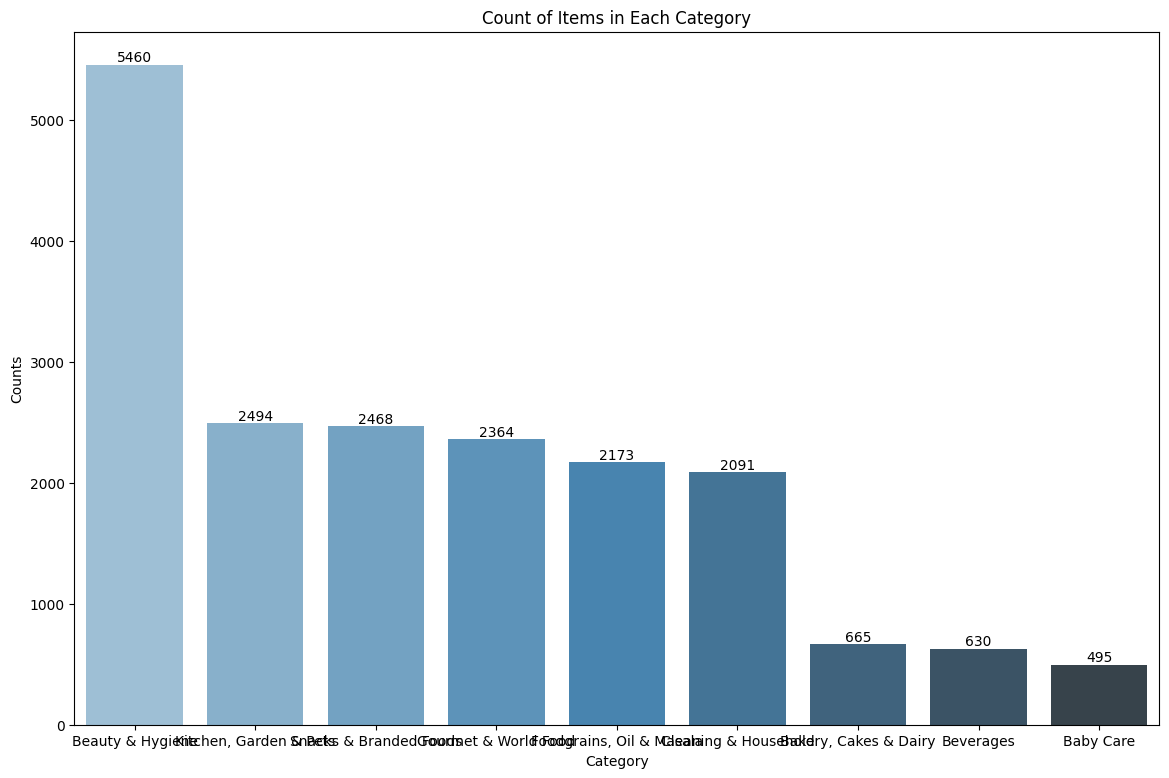

In [53]:
plt.figure(figsize=(14, 9))  # Set the figure size
sns.barplot(data=counts_df, x='Category', y='Counts', palette='Blues_d')

# Add the title
plt.title('Count of Items in Each Category')

# Add the text labels on each bar
for index, row in counts_df.iterrows():
    plt.text(index, row['Counts'], round(row['Counts'], 2), color='black', ha="center", va="bottom")

# Show the plot
plt.show()

In [39]:
df.head()

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [44]:
x=df['market_price']-df['sale_price']

In [46]:
df['discount']=x/df['market_price']

In [47]:
df.head()

,product,category,sub_category,brand,sale_price,market_price,type,rating,description,discount
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...,0.000000
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ...",0.000000
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m...",0.524000
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...,0.153409
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...,0.000000


In [51]:
counts=df['sub_category'].value_counts()
counts_df_1=pd.DataFrame({"Category":counts.index,"Counts":counts.values})[:10]

C:\Users\eatha\AppData\Local\Temp\ipykernel_20452\3967042705.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=counts_df_1, x='Category', y='Counts', palette='Blues_d')


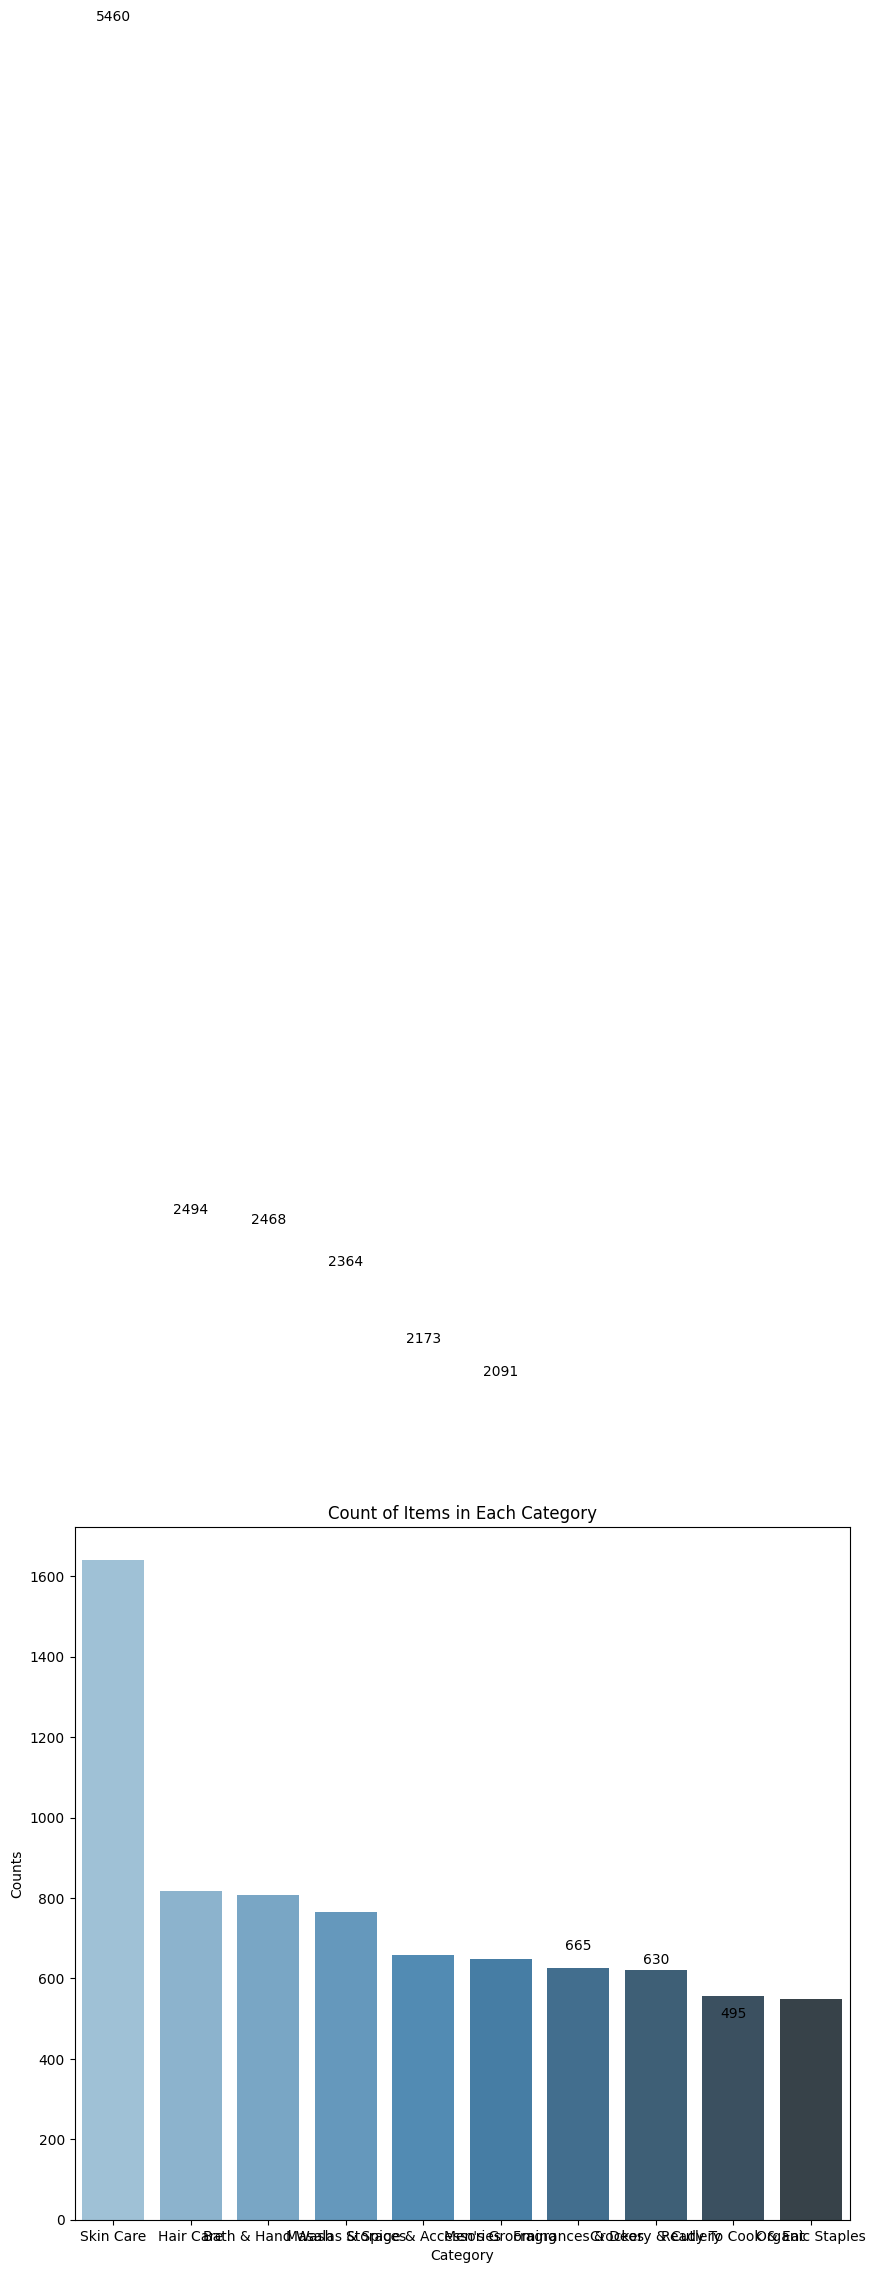

In [56]:
plt.figure(figsize=(10, 9))  # Set the figure size
sns.barplot(data=counts_df_1, x='Category', y='Counts', palette='Blues_d')

# Add the title
plt.title('Count of Items in Each Category')

# Add the text labels on each bar
for index, row in counts_df.iterrows():
    plt.text(index, row['Counts'], round(row['Counts'], 2), color='black', ha="center", va="bottom")

# Show the plot
plt.show()